In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Fitting polynomials


In [2]:
# Generate a fake dataset with Gaussian noise
x=np.linspace(-5.0,7.0)
y=x*np.sin(0.25*x)+0.1*np.random.normal(0.0,1.0,len(x))
sy=0.1*np.ones_like(y)

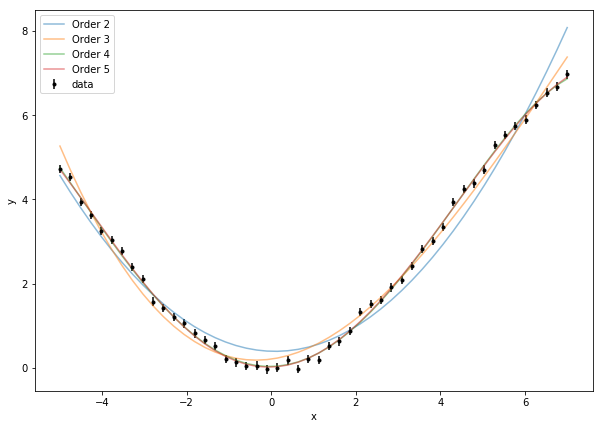

In [3]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Fit data with polynomials of different orders (and plot)
for i in np.arange(2,6):
    # Fit 
    p=np.polyfit(x,y,i)
    plt.plot(x,np.polyval(p,x),alpha=0.5,label='Order %d'%i)

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Least-squares fitting

In [4]:
import scipy.optimize

In [5]:
# Define a model
def model(x,a):
    return a[0]*np.cos(a[1]*x)+a[2]*x+a[3]

In [6]:
# Define a residual function
def residual(a,x,y,sy):
    ym=model(x,a)
    return (y-ym)/sy

In [7]:
# Parameter estimation
a=[-3.0,0.5,0.0,3.0]

In [8]:
# Fit the function and compute parameter uncertainties
q,cov_q,infodict,mesg,ier=scipy.optimize.leastsq(residual,a,args=(x,y,sy),full_output=1)
sq=np.sqrt(np.diag(cov_q*np.var(residual(q,x,y,sy))))

In [9]:
# Print parameters
for i in range(len(q)):
    print("%d %g +- %g"%(i,q[i],sq[i]))

0 -3.72181 +- 0.0746852
1 0.367887 +- 0.0059366
2 0.00883042 +- 0.00469737
3 3.72363 +- 0.0835178


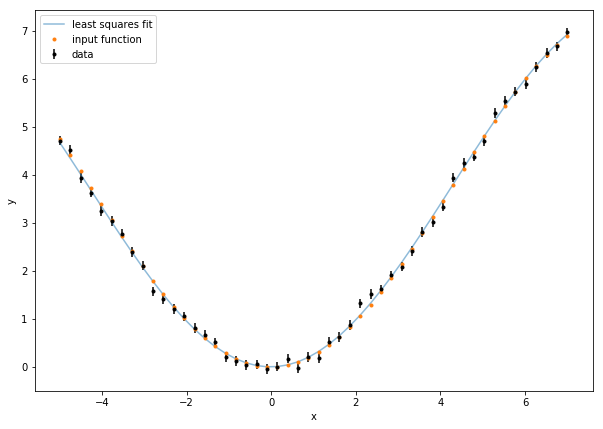

In [10]:
# Plot data
plt.figure(figsize=(10,7))
plt.errorbar(x,y,sy,fmt='k.',label='data')

# Plot model
plt.plot(x,model(x,q),alpha=0.5,label='least squares fit')

# Plot original function
plt.plot(x,x*np.sin(0.25*x),'.',label='input function')

# Plot labels/legend    
plt.xlabel("x")
plt.ylabel("y")
plt.legend()